In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ternary
import random

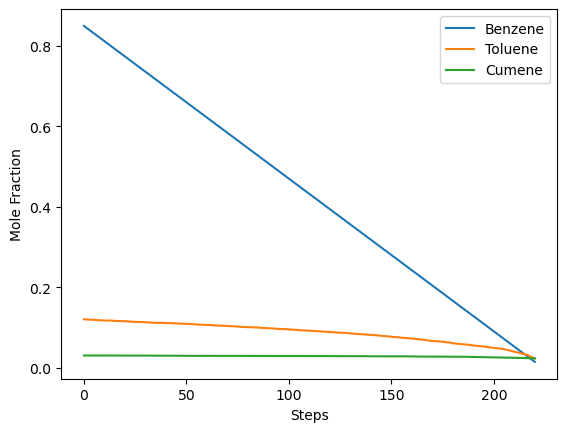

In [83]:
# Initial parameters
x_B = 0.85
x_T = 0.12
x_C = 0.03

alpha_B = 2.4
alpha_T = 1
alpha_C = 0.21

M_total = 10000
n = 38  # Number of iterations per step
m = 220  # Number of steps

# Initial number of molecules for each type
M_B = int(x_B * M_total)
M_T = int(x_T * M_total)
M_C = int(x_C * M_total)

# Store initial values
initial_values = [M_B, M_T, M_C]
molecule_counts = [initial_values]

# Function to perform one simulation step
def simulation_step(M,M_total):
    ai = [alpha_B, alpha_T, alpha_C]
    Pi = [ai[i] * M[i] for i in range(len(M))]
    max_Pi = max(Pi)
    ri = [Pi[i] / max_Pi for i in range(len(M))]
    
    for i in range(len(M)):
        if random.random() < ri[i]:
            M[i] -= 1
            M_total-=1
    
    return M

x=[] 
x.append((x_B,x_T,x_C)) 
# Run the simulation for m steps
for step in range(m):
    for _ in range(n):
        M_B, M_T, M_C = simulation_step([M_B, M_T, M_C],M_total)
    x.append((M_B/M_total, M_T/M_total, M_C/M_total))

# Plotting the mole fractions over steps
mole_fractions_B = [z[0] for z in x]
mole_fractions_T = [z[1] for z in x]
mole_fractions_C = [z[2] for z in x]
steps = range(m+1)

plt.plot(steps, mole_fractions_B, label='Benzene')
plt.plot(steps, mole_fractions_T, label='Toluene')
plt.plot(steps, mole_fractions_C, label='Cumene')
plt.xlabel('Steps')
plt.ylabel('Mole Fraction')
plt.legend()
plt.show()


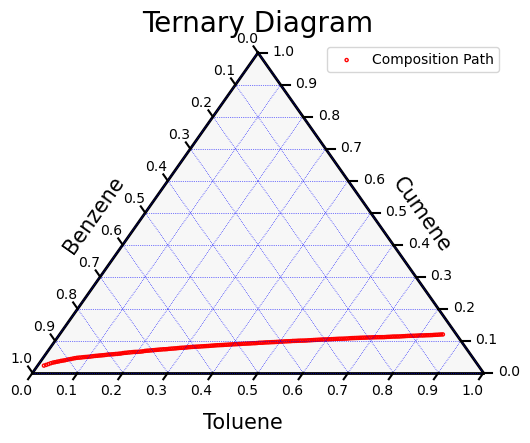

In [84]:
# Set up the ternary plot
scale = 1.0
figure, tax = ternary.figure(scale=scale)

# Draw boundary and grid lines
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

# Set axis labels
fontsize = 15
tax.left_axis_label("Benzene", fontsize=fontsize,offset=0.12)
tax.right_axis_label("Cumene", fontsize=fontsize,offset=0.12)
tax.bottom_axis_label("Toluene", fontsize=fontsize,offset=0.12)

# Plot data points
tax.scatter(x, marker='o', facecolor='None',edgecolor='red',label='Composition Path',s=5)

# Add a title
tax.set_title("Ternary Diagram", fontsize=20)

# Set ticks
ticks = ticks = [str(i/10.0) for i in range(11)]
tax.ticks(axis='l', ticks=ticks,offset=0.02)
tax.ticks(axis='r', ticks=ticks,offset=0.02)
tax.ticks(axis='b', ticks=ticks,offset=0.02)

tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

# Show legend
tax.legend()

# Show the plot
tax.show()